In [3]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import emcee as mc
import lmfit as lf
#import time as t #Thus far nothing has been slow enough to warrant using this

In [91]:
#Setup - y = f(x) = x^2

#Fakedata
xdata = np.linspace(1,np.random.randint(10),50)
ydata = np.zeros(len(xdata))
noise = np.random.normal(0,1,len(xdata))
for i,n in enumerate(xdata):
    ydata[i] = n**2+noise[i]
sigdata = abs(noise)
weighdata = 1/sigdata

#Function
def f(x,a,b,c):
    return a*x**2+b*x+c

#Points representing function
xcurve = np.linspace(0,5,50)
ycurve = xcurve**2

#Initial Guess
p0 = [1,0,0]

## Non-Linear Least Squares

In [92]:
#scipy.optimize

#Do fit
s_fit = opt.curve_fit(f,xdata,ydata,p0,sigma=sigdata,absolute_sigma=True)

#Define things from fit
s_a = s_fit[0][0]
s_b = s_fit[0][1]
s_c = s_fit[0][2]

s_error = s_fit[1]

#Create array to plot
s_curve = s_a*xcurve**2+s_b*xcurve+s_c

#Print Errors
print('Error:'+str(np.sqrt(np.diag(s_error))))
print('a:'+str(s_a))
print('b:'+str(s_b))
print('c:'+str(s_c))

Error:[0.02116669 0.12136655 0.15757552]
a:0.9686235915659397
b:0.18271979326600524
c:-0.2397209884523012


In [97]:
#lmfit

#Setup
l_mod = lf.Model(f)
params = l_mod.make_params(a=1, b=0, c=0)

#Do fit
l_fit = l_mod.fit(ydata, params, x=xdata, weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_a = l_dict['a']
l_b = l_dict['b']
l_c = l_dict['c']

#Create array to plot
l_curve = l_a*xcurve**2+l_b*xcurve+l_c

l_fit #Gives slightly lower error - unsure why. also not significantly lower.

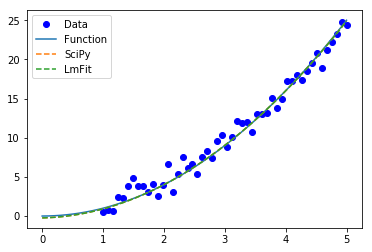

In [94]:
#Plotting
plt.plot(xdata,ydata,'bo',label='Data')
plt.plot(xcurve,ycurve,label='Function')
plt.plot(xcurve,s_curve,linestyle='--',label='SciPy')
plt.plot(xcurve,l_curve,linestyle='--',label='LmFit')

plt.legend()

## Chi-Squared

In [ ]:
#scipy.optimize

#Do fit
s_fit = opt.chisquare(f,xdata,ydata,p0,sigma=sigdata)

#Define things from fit
s_a = s_fit[0][0]
s_b = s_fit[0][1]
s_c = s_fit[0][2]

s_error = s_fit[1]

#Create array to plot
s_curve = s_a*xcurve**2+s_b*xcurve+s_c